In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Load image
img_path = 'Daffa.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Konversi ke HSV untuk deteksi warna
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [43]:
# Range warna biru
lower_blue = np.array([100, 150, 0])
upper_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# Range warna merah
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])
mask_red = cv2.inRange(hsv, lower_red1, upper_red1) | cv2.inRange(hsv, lower_red2, upper_red2)

# Range warna hijau
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)

In [49]:
def apply_black_text_on_white_bg(mask):
    white_bg = np.full_like(img_rgb, 255)  # latar belakang putih
    black_text = np.zeros_like(img_rgb)   # teks hitam
    thick_mask = cv2.dilate(mask, np.ones((3, 3), np.uint8), iterations=2)  # pertebal mask
    text_black = cv2.bitwise_and(black_text, black_text, mask=thick_mask)
    background_white = cv2.bitwise_and(white_bg, white_bg, mask=cv2.bitwise_not(thick_mask))
    return cv2.add(background_white, text_black)

In [53]:
# Terapkan ke masing-masing warna
highlight_blue_blacktext = apply_black_text_on_white_bg(mask_blue)
highlight_red_blacktext = apply_black_text_on_white_bg(mask_red)
highlight_green_blacktext = apply_black_text_on_white_bg(mask_green)

In [55]:
# Tampilkan hasil dalam layout 2x2
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

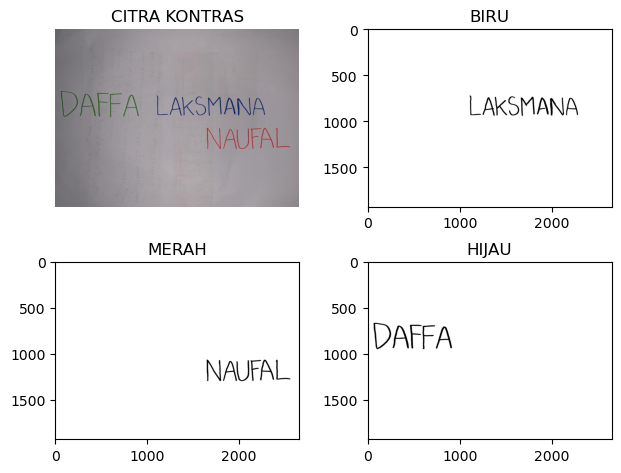

In [57]:
# Plot hasil akhir dengan tulisan hitam dan latar belakang putih
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("CITRA KONTRAS")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(highlight_blue_blacktext)
plt.title("BIRU")
plt.axis('on')

plt.subplot(2, 2, 3)
plt.imshow(highlight_red_blacktext)
plt.title("MERAH")
plt.axis('on')

plt.subplot(2, 2, 4)
plt.imshow(highlight_green_blacktext)
plt.title("HIJAU")
plt.axis('on')

plt.tight_layout()
plt.show()

In [59]:
# Ubah teks hasil deteksi warna menjadi warna putih pada masing-masing mask
def apply_white_text(mask):
    # Buat citra putih (255,255,255) dengan ukuran sama
    white_bg = np.full_like(img_rgb, 255)
    # Ambil area teks dari gambar putih
    return cv2.bitwise_and(white_bg, white_bg, mask=bold_text(mask))

In [61]:
# Terapkan fungsi ke masing-masing mask warna
highlight_blue_white = apply_white_text(mask_blue)
highlight_red_white = apply_white_text(mask_red)
highlight_green_white = apply_white_text(mask_green)

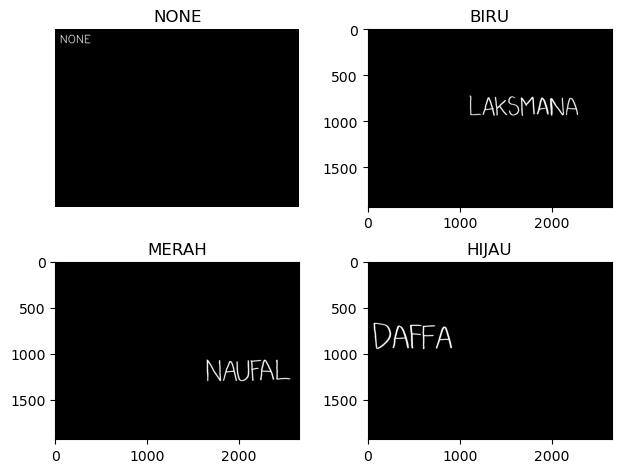

In [67]:
# Gambar hitam polos bertulisan "NONE" putih
none_image = np.zeros_like(img_rgb)
cv2.putText(none_image, "NONE", (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 4, (255, 255, 255), 5, cv2.LINE_AA)

# Plot hasil sesuai permintaan
plt.subplot(2, 2, 1)
plt.imshow(none_image)
plt.title("NONE")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(highlight_blue_white)
plt.title("BIRU")
plt.axis('on')

plt.subplot(2, 2, 3)
plt.imshow(highlight_red_white)
plt.title("MERAH")
plt.axis('on')

plt.subplot(2, 2, 4)
plt.imshow(highlight_green_white)
plt.title("HIJAU")
plt.axis('on')

plt.tight_layout()
plt.show()


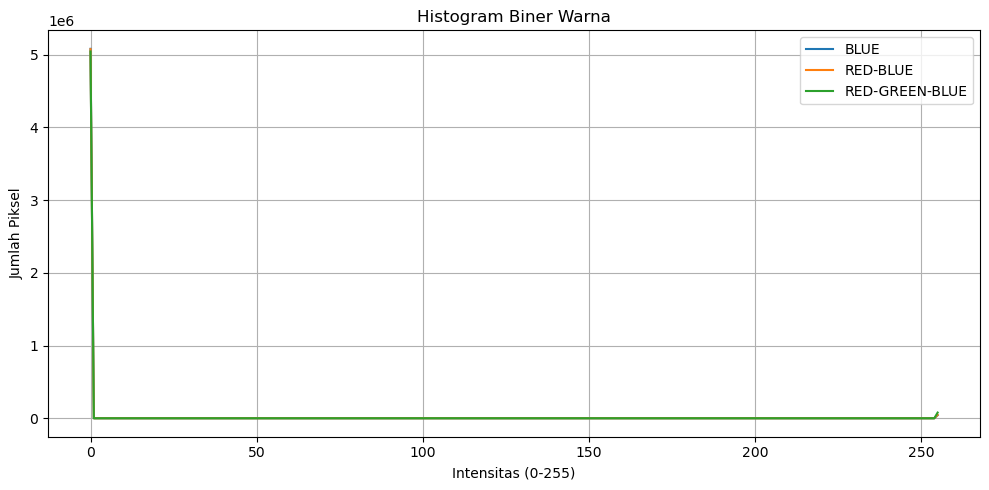

In [69]:
# Plot histogram masing-masing hasil
plt.figure(figsize=(10, 5))
for key in display_keys[1:]:  # Skip 'NONE'
    hist = cv2.calcHist([masks[key]], [0], None, [256], [0, 256])
    plt.plot(hist, label=key)
plt.title('Histogram Biner Warna')
plt.xlabel('Intensitas (0-255)')
plt.ylabel('Jumlah Piksel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Membaca gambar dan konversi ke RGB
original = cv2.imread('Foto.jpg')  # Ganti path sesuai lokasi file
rgb_image = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

In [17]:
# Konversi ke grayscale
gray_image = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

In [18]:
# Fungsi peningkatan kecerahan dan kontras
increase_brightness = lambda img, val=50: cv2.add(img, val)
equalize_contrast = lambda img: cv2.equalizeHist(img)

In [19]:
# Membuat variasi hasil
results = {
    "Gambar Asli (RGB)": rgb_image,
    "Grayscale": gray_image,
    "Grayscale + Brightness": increase_brightness(gray_image),
    "Grayscale + Contrast": equalize_contrast(gray_image),
    "Grayscale + Brightness + Contrast": equalize_contrast(increase_brightness(gray_image))
}

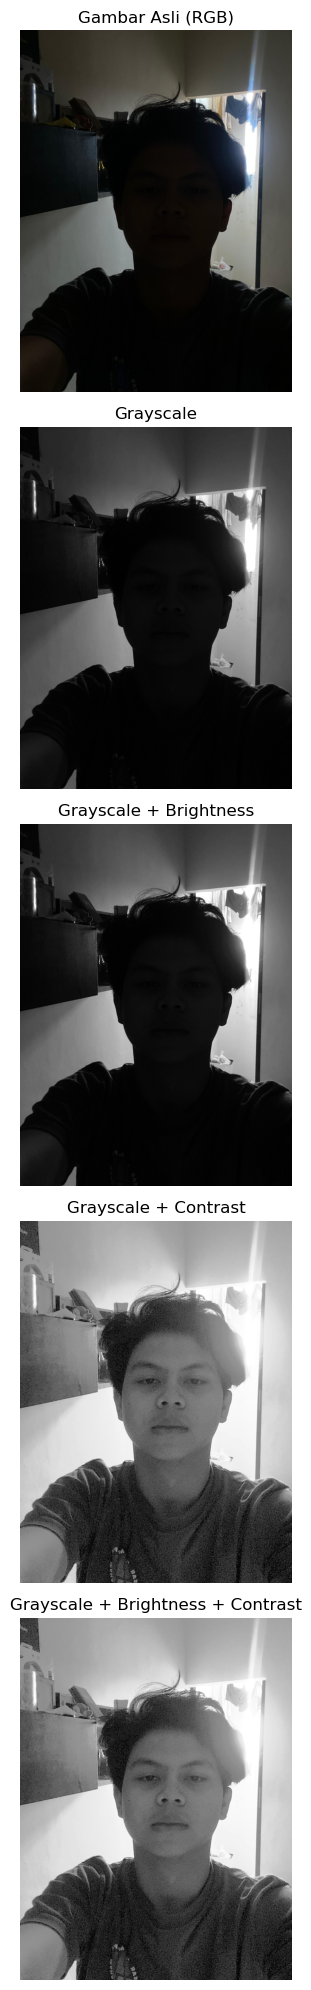

In [20]:
# Menampilkan hasil secara vertikal
plt.figure(figsize=(6, 20))
for idx, (title, img) in enumerate(results.items()):
    plt.subplot(len(results), 1, idx + 1)
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()